 # **Convolutional Neural Network (CNN)**
 - Nama : Muhamad Habibi Budiman
 - NIM  : 102022300226
 - CaAs : 2506


Import Libarry

In [ ]:
import kagglehub
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import os
import tqdm
import random
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

## **Cats VS Dogs**

Download Dataset

In [ ]:
#Download latest version
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/microsoft-catsvsdogs-dataset


Membuat Dataframe Untuk Input Dan Output

In [ ]:
input_path = []
label = []

# Direktori untuk Kucing dan Anjing (hardcoded)
cat_dir = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/"
dog_dir = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/"

In [ ]:
# Mengumpulkan file dari folder Cat (label 1) tanpa pengecekan if/else
print(f"Mengumpulkan file dari '{cat_dir}'...")
for file_name in os.listdir(cat_dir):
    file_path = os.path.join(cat_dir, file_name)
    input_path.append(file_path)
    label.append(1) # 1 untuk Kucing

# Mengumpulkan file dari folder Dog (label 0) tanpa pengecekan if/else
print(f"Mengumpulkan file dari '{dog_dir}'...")
for file_name in os.listdir(dog_dir):
     file_path = os.path.join(dog_dir, file_name)
     input_path.append(file_path)
     label.append(0) # 0 untuk Anjing

Mengumpulkan file dari '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/'...
Mengumpulkan file dari '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/'...


In [ ]:
# Membuat DataFrame
df = pd.DataFrame({'image_path': input_path,'label': label})

VIsualisasi Data

In [ ]:
print("\nDistribusi Label:")
display(df['label'].value_counts())


Distribusi Label:


label
1    12501
0    12501
Name: count, dtype: int64

In [ ]:
df.head(20000)

image_path  label
0      /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      1
1      /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      1
2      /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      1
3      /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      1
4      /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      1
...                                                  ...    ...
19995  /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      0
19996  /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      0
19997  /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      0
19998  /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      0
19999  /kaggle/input/microsoft-catsvsdogs-dataset/Pet...      0

[20000 rows x 2 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25002 entries, 0 to 25001
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  25002 non-null  object
 1   label       25002 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


image_path    0
label         0
dtype: int64

In [ ]:
print ("Jumlah duplikasi data: ", df.duplicated().sum())

Jumlah duplikasi data:  0


Visualisasi gambar kucing

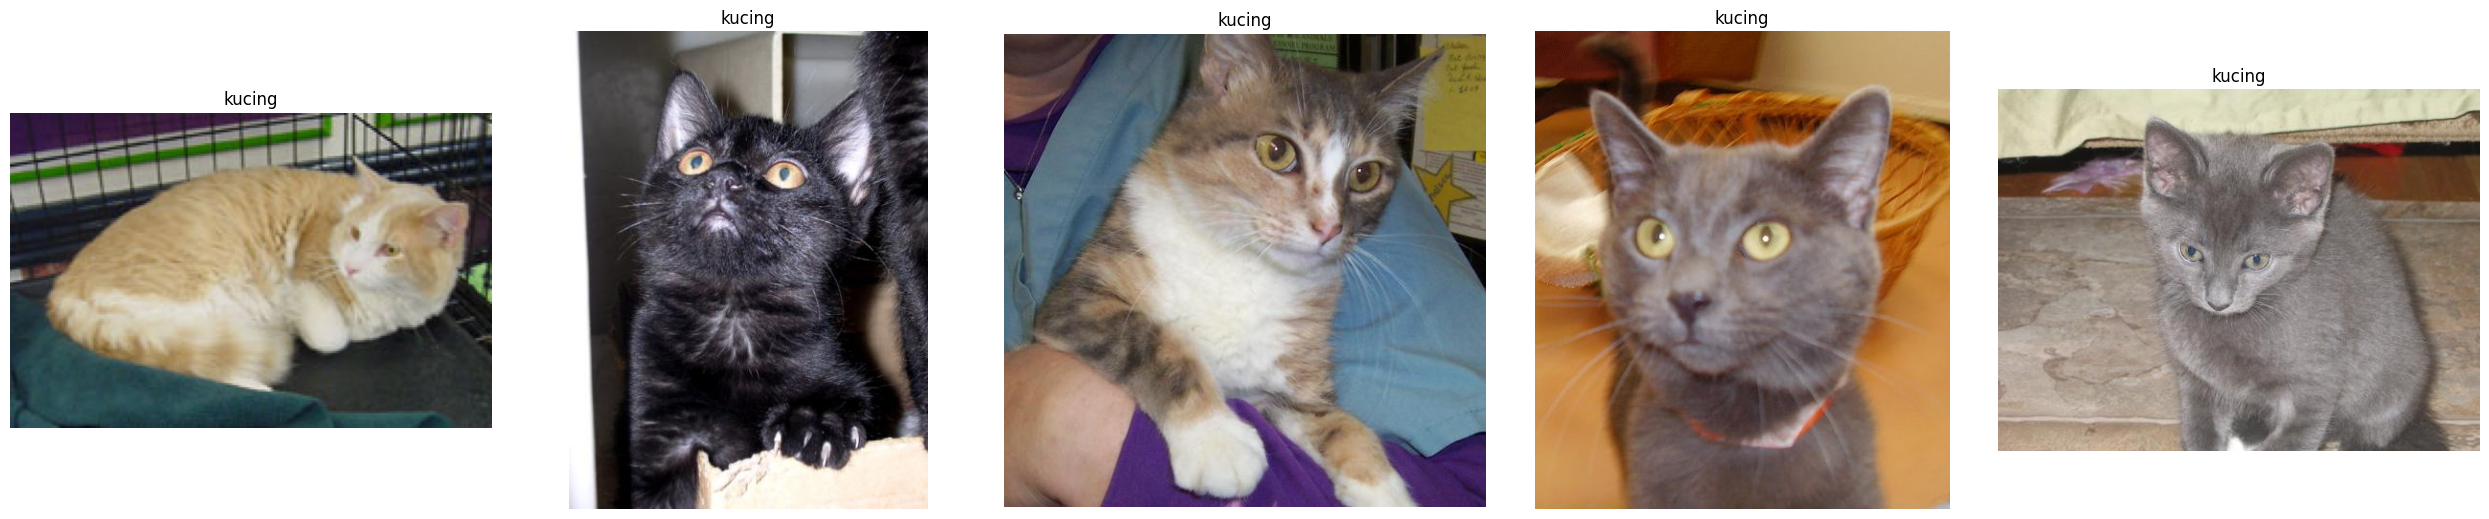

In [ ]:
# Fungsi untuk memuat gambar (g
def load_img(file_path):
    return Image.open(file_path)


# Filter DataFrame untuk 'Kucing' dengan label 1
temp = df[df['label'] == 1]['image_path']

# Pilih indeks awal secara acak
start = random.randint(0, len(temp))

# Pilih 5 gambar dimulai dari indeks acak
files = temp[start:start + 5]

# Membuat figure besar untuk menampilkan grid gambar
plt.figure(figsize=(25, 25))

# Loop melalui gambar dan tampilkan dalam grid 5x5
for index, file in enumerate(files):
    plt.subplot(5, 5, index + 1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('kucing')
    plt.axis('off')

plt.tight_layout()
plt.show()

Visualisasi gambar kucing

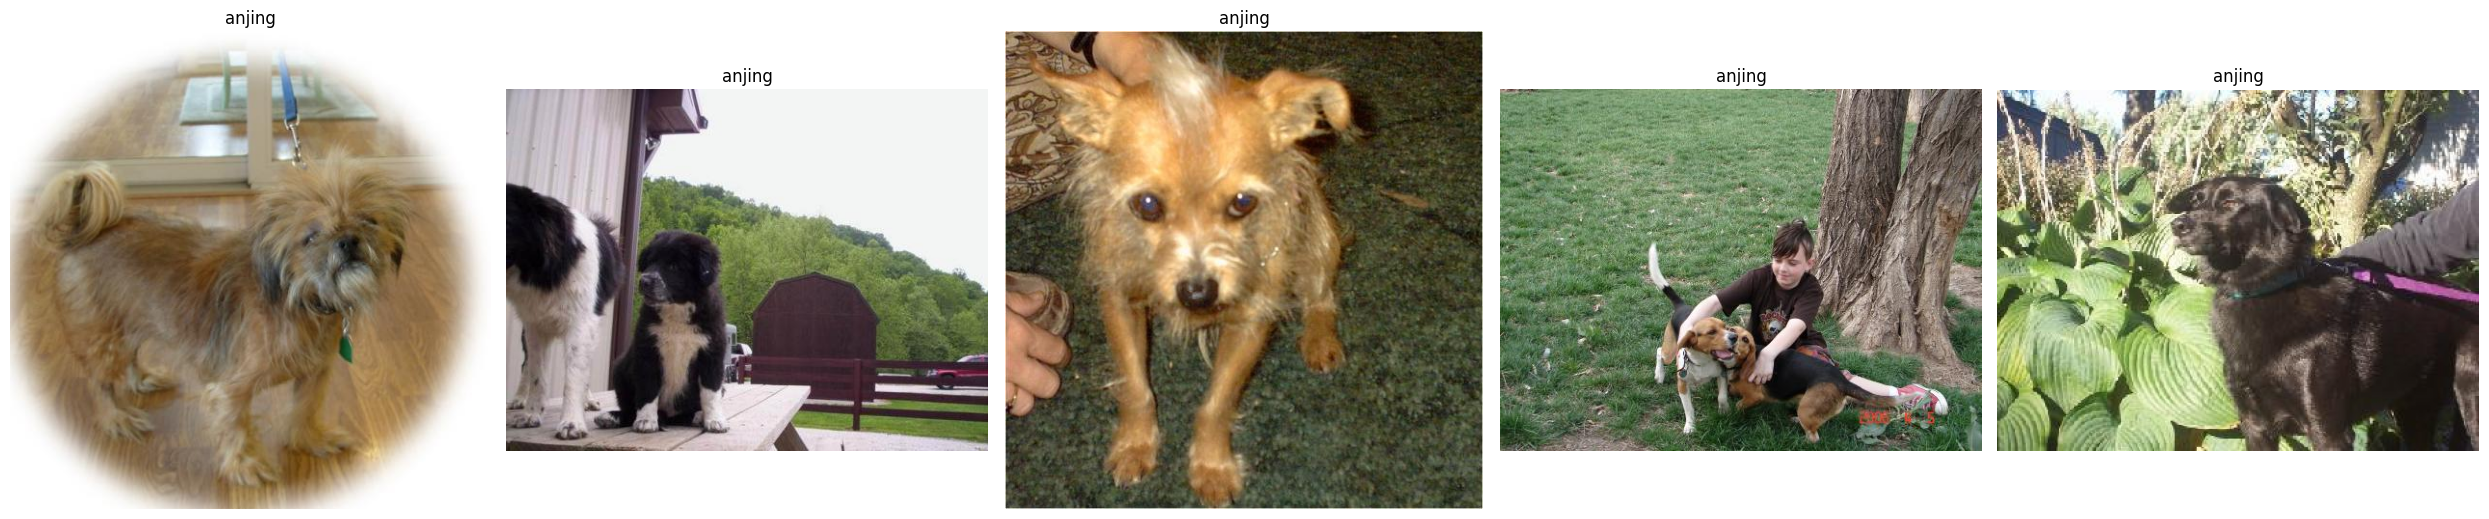

In [ ]:
# Fungsi untuk memuat gambar
def load_img(file_path):
    return Image.open(file_path)


# Filter DataFrame untuk 'Anjing' dengan label 0
temp = df[df['label'] == 0]['image_path']

# Pilih indeks awal secara acak
start = random.randint(0, len(temp))

# Pilih 5 gambar dimulai dari indeks acak
files = temp[start:start + 5]

# Membuat figure besar untuk menampilkan grid gambar
plt.figure(figsize=(25, 25))

# Loop melalui gambar dan tampilkan dalam grid 5x5
for index, file in enumerate(files):
    plt.subplot(5, 5, index + 1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title( 'anjing')
    plt.axis('off')

plt.tight_layout()
plt.show()

Data Cleaning

In [ ]:
from PIL import Image, UnidentifiedImageError
import os  # Untuk memanipulasi file dan folder

def find_corrupted(folder):
    corrupted_files = []  # List untuk menyimpan nama file yang rusak
    for fname in os.listdir(folder):  # Iterasi setiap file dalam folder
        fpath = os.path.join(folder, fname)  # Gabungkan nama file dengan path folder
        try:
            img = Image.open(fpath)  # Coba buka file gambar
            img.verify()  # Verifikasi apakah gambar valid (bukan rusak)
        except (IOError, UnidentifiedImageError, Exception):  # Tangani error jika file tidak valid
            corrupted_files.append(fpath) # Tambahkan file yang rusak ke list
    return corrupted_files  # Kembalikan list file yang rusak


# Tentukan path folder gambar kucing dan anjing
cats_folder = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/"
dogs_folder = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/"

# Panggil fungsi untuk mencari file yang rusak pada masing-masing folder
corrupted_cats = find_corrupted(cats_folder)
corrupted_dogs = find_corrupted(dogs_folder)

print("File yang rusak pada cats:", corrupted_cats)  # Menampilkan file rusak di folder kucing
print("Jumlah file yang rusak pada cats:", len(corrupted_cats)) # Menampilkan jumlah file rusak di folder kucing

print("File yang rusak pada dogs:", corrupted_dogs)  # Menampilkan file rusak di folder anjing
print("Jumlah file yang rusak pada dogs:", len(corrupted_dogs)) # Menampilkan jumlah file rusak di folder anjing

File yang rusak pada cats: ['/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/Thumbs.db', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/666.jpg']
Jumlah file yang rusak pada cats: 2
File yang rusak pada dogs: ['/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11702.jpg', '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/Thumbs.db']
Jumlah file yang rusak pada dogs: 2


Train/Test Split **Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

print("Training set size:", len(train_df))
print("Testing set size:", len(test_df))

Training set size: 20001
Testing set size: 5001


In [ ]:
# Menghapus file yang rusak dari DataFrame
corrupted_files = corrupted_cats + corrupted_dogs
train_df = train_df[~train_df['image_path'].isin(corrupted_files)]
test_df = test_df[~test_df['image_path'].isin(corrupted_files)]

# Membuat data generator
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi piksel
    rotation_range=20, # Rotasi acak
    width_shift_range=0.2, # Geser lebar acak
    height_shift_range=0.2, # Geser tinggi acak
    shear_range=0.2, # Shear transformation acak
    zoom_range=0.2, # Zoom acak
    horizontal_flip=True, # Flip horizontal acak
    fill_mode='nearest' # Mengisi piksel yang hilang
)

# Membuat generator untuk training dan testing
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='raw', # Karena labelnya adalah angka (0 atau 1)
    seed=42
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='raw',
    seed=42
)

Found 19999 validated image filenames.
Found 4999 validated image filenames.


Membuat Model

### **pre-trained model : MobileNet**

In [ ]:
from tensorflow.keras.applications import MobileNetV2

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet',
                         include_top=False,
                         input_shape=(128, 128, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

base_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "mobilenetv2_1.00_128"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Create an EarlyStopping callback
early_stop = EarlyStopping(patience=2, restore_best_weights=True)

# Calculate steps per epoch
steps_per_epoch = len(train_df) // train_generator.batch_size

# Train the model
history_transfer = best_model.fit(
    train_generator,
    validation_data=test_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    callbacks=[early_stop]
)

Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 182s 267ms/step - accuracy: 0.9168 - loss: 0.3866 - val_accuracy: 0.9420 - val_loss: 0.1401
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.9375 - loss: 0.0907 - val_accuracy: 0.9424 - val_loss: 0.1464
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 142s 227ms/step - accuracy: 0.9433 - loss: 0.1379 - val_accuracy: 0.9478 - val_loss: 0.1294
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.9375 - loss: 0.1443 - val_accuracy: 0.9492 - val_loss: 0.1292
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 171s 224ms/step - accuracy: 0.9497 - loss: 0.1263 - val_accuracy: 0.9442 - val_loss: 0.1316
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.9062 - loss: 0.1864 - val_accuracy: 0.9486 - val_loss: 0.1275
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 175s 225ms/step - accuracy: 0.9542 - loss: 0.1171 - val_accuracy: 0.9510 - val_loss: 0.1236
Epoch 8/10
  1/624 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9688 - loss: 0

#### Evaluasi

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# --- Evaluate Fine-tuned Pre-trained Model ---
print("\nEvaluating Fine-tuned Pre-trained Model...")
loss_transfer, accuracy_transfer = model.evaluate(test_generator)

print(f"Fine-tuned Model Test Loss (from evaluate): {loss_transfer:.4f}")
print(f"Fine-tuned Model Test Accuracy (from evaluate): {accuracy_transfer:.4f}")

# Get predictions for fine-tuned pre-trained model
test_generator.reset() # Reset generator for the second model
y_true_transfer = []
y_pred_prob_transfer = []

for _ in range(len(test_generator)):
    images, labels = next(test_generator)
    y_true_transfer.extend(labels)
    y_pred_prob_transfer.extend(model.predict(images))

y_true_transfer = np.array(y_true_transfer)
y_pred_prob_transfer = np.array(y_pred_prob_transfer)
y_pred_transfer = (y_pred_prob_transfer > 0.5).astype(int)

# Calculate and print classification report for fine-tuned pre-trained model
print("\nFine-tuned Model Classification Report:")
print(classification_report(y_true_transfer, y_pred_transfer))

# Calculate and print confusion matrix for fine-tuned pre-trained model
print("\nFine-tuned Model Confusion Matrix:")
print(confusion_matrix(y_true_transfer, y_pred_transfer))

Save Best model

In [ ]:
# Save the best model to an .h5 file
best_model.save('best_model_MobileNet_catsvsdogs_deploy.h5')
print("Model saved successfully!")

Donload model

In [ ]:
from google.colab import files

files.download('best_model_MobileNet_catsvsdogs_deploy.h5')

## **Food-101**

In [ ]:
#import necessary libraries
import os
import copy
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torchvision
from torchvision import models
from sklearn.utils import shuffle
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.font_manager
from collections import OrderedDict

Download Dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("dansbecker/food-101")

print("Path to dataset files:", path)

extract Dataset

In [ ]:
# Helper function to download data and extract
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")

### Read Dataset

Menampilkan file classes yang saya akan tampilkan adalah 20 data awal, dari sekian banyak nya data

In [ ]:
classes = open("/kaggle/input/food-101/food-101/food-101/meta/classes.txt", 'r').read().splitlines() # 'r' = read
classes_21 = classes[:20] + ['other']
classes_21, len(classes_21)

Menampilakan data testing gambar dari 5 teratas

In [ ]:
print("Testing Images")
!head -n 5 /kaggle/input/food-101/food-101/food-101/meta/test.txt

Menampilakan data training gambar dari 5 teratas

In [ ]:
print("Training Images")
!head -n 5 /kaggle/input/food-101/food-101/food-101/meta/train.txt

### Membuat sebuah DataFrame dari file teks yang berisi nama-nama gambar dengan format path relatif.

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

def prep_df(path: str) -> pd.DataFrame:
    # Membaca file dan mendapatkan nama gambar dalam list
    with open(path, 'r') as file:
        array = file.read().splitlines()

    # Menentukan path untuk gambar (menggunakan jalur absolut yang benar)
    img_path = "/kaggle/input/food-101/food-101/food-101/images/"

    # Membuat list untuk path lengkap gambar
    full_path = []
    labels = []
    images = []

    for img in array:
        # Memisahkan nama label dan gambar
        label, image = img.split('/')
        labels.append(label)
        images.append(image)
        full_path.append(img_path + img + ".jpg")

    # Membuat DataFrame dengan dua kolom: label dan path gambar
    imgs_df = pd.DataFrame({
        'label': labels,
        'path': full_path
    })

    # Mengacak urutan data
    imgs_df = shuffle(imgs_df)

    return imgs_df

Melihat hasil pembuatan Dataframe

In [ ]:
train_imgs = prep_df('/kaggle/input/food-101/food-101/food-101/meta/train.txt')
test_imgs = prep_df('/kaggle/input/food-101/food-101/food-101/meta/test.txt')

train_imgs.head(5)

### Visualiasasi secara acak dengan total jumlah gambar 24

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 5))

# Menentukan jumlah baris dan kolom untuk grid
num_rows = 3
num_cols = 8

# Loop untuk menampilkan gambar secara acak
for index in range(num_rows * num_cols):
    # Mengambil indeks acak dari dataset
    random_image_idx = np.random.randint(0, train_imgs.shape[0])

    # Membaca gambar berdasarkan path yang dipilih secara acak
    image = plt.imread(train_imgs.path.iloc[random_image_idx])

    # Mengambil label gambar
    image_label = train_imgs.label.iloc[random_image_idx]

    # Menambahkan subplot untuk setiap gambar
    ax = plt.subplot(num_rows, num_cols, index + 1)

    # Menampilkan gambar
    plt.imshow(image)

    # Menambahkan judul dengan label gambar
    plt.title(image_label)

    # Menyembunyikan axis (garis sumbu)
    plt.axis("off")


In [ ]:
# Data augmentation for training
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       torchvision.transforms.AutoAugment(torchvision.transforms.AutoAugmentPolicy.IMAGENET),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])
# Data augmentation for testing
test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

In [ ]:
class Label_encoder:
    def __init__(self, labels):
        labels = list(set(labels))
        self.labels = {label: idx for idx, label in enumerate(classes)}

    def get_label(self, idx):
        return list(self.labels.keys())[idx]

    def get_idx(self, label):
        return self.labels[label]

encoder = Label_encoder(classes)
for i in range(20):
    print(encoder.get_label(i), encoder.get_idx( encoder.get_label(i) ))

In [ ]:
class Food20(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return self.dataframe.shape[0]

    def __getitem__(self, idx):
        img_name = self.dataframe.path.iloc[idx]
        image = Image.open(img_name)
        if image.mode != 'RGB':
            image = image.convert('RGB')
        label = encoder.get_idx(self.dataframe.label.iloc[idx])

        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
train_dataset = Food20(train_imgs, transform=train_transforms)
test_dataset = Food20(test_imgs, transform=test_transforms)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [ ]:
# Testing the retrieval of a single image
for i in range(10):
    image = train_dataset.__getitem__(i)
    print(encoder.get_label(image[1]), image[0].shape)

Save best model

In [ ]:
# Save the best model to an .h5 file
model_inceptionv3.save('best_inceptionv3_model_food-101_deploy.h5')
print("Model saved successfully!")

In [ ]:
weights = models.DenseNet201_Weights.IMAGENET1K_V1
model = models.densenet201(weights = weights)

In [ ]:
# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

In [ ]:
import requests as reqs

url = "https://github.com/Prakhar998/Food-Classification/raw/master/food_classifier.pt"  
r = reqs.get(url, allow_redirects=True)

open("./food_classifier.pt", "wb").write(r.content)

In [ ]:
checkpoint_path = "./food_classifier.pt"
classifier = nn.Sequential(
    nn.Linear(1920,1024),
    nn.LeakyReLU(),
    nn.Linear(1024,101),
)

model.classifier = classifier
model.load_state_dict(torch.load(checkpoint_path,map_location='cpu'),strict=False)

model.to(device)

In [ ]:
#hyper parameters
num_epochs = 3

# loss
loss_fn = nn.CrossEntropyLoss()

# all parameters are being optimized
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=[0.9, 0.999])

model = model.to(device)

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device):
  # Put model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  print("--> Training Progress")
  # Loop through data loader data batches
  for batch, (X, y) in enumerate(tqdm(dataloader)):
      # Send data to target device
      images, labels = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(images)

      # 2. Calculate  and accumulate loss
      loss = loss_fn(y_pred, labels)
      train_loss += loss.item()

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

      # Calculate and accumulate accuracy metric across all batches
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      train_acc += (y_pred_class == labels).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
      print("--> Testing Progress")
      # Loop through DataLoader batches
      for batch, (X, y) in enumerate(tqdm(dataloader)):
          # Send data to target device
          images, labels = X.to(device), y.to(device)

          # 1. Forward pass
          test_pred_logits = model(images)

          # 2. Calculate and accumulate loss
          loss = loss_fn(test_pred_logits, labels)
          test_loss += loss.item()

          # Calculate and accumulate accuracy
          test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)

          test_acc += ((test_pred_labels == labels).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [ ]:
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device):
  # Create empty results dictionary
  history = {
      "train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": [],
      'best train acc': (0, 0),
      "best_model": dict()
  }

  # Loop through training and testing steps for a number of epochs
  for epoch in range(epochs):
      print('Epoch {}/{}'.format(epoch + 1, num_epochs))

      train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
      test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

      # Print out what's happening
      print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
          f"\n\n=============================\n"
      )

      # Update results dictionary
      history["train_loss"].append(train_loss)
      history["train_acc"].append(train_acc)
      history["test_loss"].append(test_loss)
      history["test_acc"].append(test_acc)
      if test_loss < history["test_acc"][len(history["test_acc"]) - 1]:
          history["best_model"] = model.state_dict()

      if test_acc > 0.95:
         break

  # Return the filled results at the end of the epochs
  return model, history

In [ ]:
model, history = train(model, train_loader, test_loader, optimizer, loss_fn, num_epochs, device)

In [ ]:
def evaluate(model, dataloader):

  random = np.random.randint(0, len(dataloader))

  with torch.no_grad():
    model.eval()
    n_correct = 0
    n_samples = 0

    for images, labels in tqdm(dataloader):
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)

      preds = torch.argmax(torch.softmax(outputs, 1), 1)

      # Converting this problem to a problem with 21 clases only
      preds = np.array([pred.cpu() if pred < 20 else 20 for pred in preds])
      labels = np.array([label.cpu() if label < 20 else 20 for label in labels])

      n_samples += labels.shape[0]
      n_correct += (preds==labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(acc)

In [ ]:
evaluate(model,test_loader)

In [ ]:
class Label_encoder_21:
    def __init__(self, labels):
        labels = list(set(labels))
        self.labels = {label: idx for idx, label in enumerate(labels)}

    def get_label(self, idx):
        return list(self.labels.keys())[idx]

    def get_idx(self, label):
        return self.labels[label]

encoder_21 = Label_encoder(classes_21)
encoder_21.get_label(0), encoder.get_idx( encoder_21.get_label(0) )

In [ ]:
#This line of code saves the best model's state dictionary (or parameters) from the training history to a file named solution.pth.
torch.save(history['best_model'], "./solution.h5")

In [ ]:
import torch
from PIL import Image
from torchvision import transforms

def classify_image(image_path, model, label_encoder, device):
    # Load and preprocess the input image
    image = Image.open(image_path)
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image_tensor = preprocess(image).unsqueeze(0).to(device)

    # Perform prediction
    with torch.no_grad():
        model.eval()
        output = model(image_tensor)

    # Get predicted class index
    _, predicted_idx = torch.max(output, 1)
    predicted_idx = predicted_idx.item()

    # Map index to class name
    predicted_label = label_encoder.get_label(predicted_idx)

    return predicted_label

# Load the saved model and label encoder
model = models.densenet201(weights=None)
classifier = nn.Sequential(
    nn.Linear(1920, 1024),
    nn.LeakyReLU(),
    nn.Linear(1024, 101),
)
model.classifier = classifier
model.load_state_dict(torch.load("solution.h5", map_location=device))
model.to(device)
model.eval()

label_encoder = Label_encoder(classes)


# Classify an image
image_path = "/kaggle/working/food-101/images/chicken_curry/1208906.jpg"  # Replace with the path to your image
predicted_label = classify_image(image_path, model, label_encoder, device)
print("Predicted Label:", predicted_label)

## Emotion Mining on Comments About Tom Lembong Case

In [ ]:
!pip install -q transformers

In [ ]:
# check for the GPU
!nvidia-smi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import emoji
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import random
import re

In [ ]:
!ls /kaggle/input/emotion-mining-on-comments-about-tom-lembong-case

In [ ]:
tr = pd.read_csv('/kaggle/input/emotion-mining-on-comments-about-tom-lembong-case/train.csv')
ts = pd.read_csv('/kaggle/input/emotion-mining-on-comments-about-tom-lembong-case/test.csv')

In [ ]:
print(train_df["label"].unique())

In [ ]:
print("Train data size \n", tr.shape )
print()
print("Test data size \n", ts.shape )
print()

In [ ]:
tr.head()

In [ ]:
ts.head()

In [ ]:
mapping = {
    "SADNESS": 0,
    "ANGER": 1,
    "SUPPORT": 2,
    "HOPE": 3,
    "DISAPPOINTMENT": 4
}

tr["label"] = tr["label"].map(mapping)

In [ ]:
ts["label"] = ts["label"].map(mapping)

In [ ]:
tr['label'].value_counts()


In [ ]:
ts['label'].value_counts()

In [ ]:
print("cek duplikasi data pada data train : ", tr.duplicated().sum())
print("cek duplikasi data pada data test : ", ts.duplicated().sum())

In [ ]:
print("cek missing value train : ", tr.isnull().sum())
print("cek missing value test : ", ts.isnull().sum())

In [ ]:
labels = train_df['label'].unique()
for emotion in labels:
    example_text = train_df[train_df.label == emotion]['text'].sample(1).values[0]
    print(f"{emotion}:\n{example_text}\n")

In [ ]:
textlen = tr['text'].apply(lambda x: len(x.split()))

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5))
plt.hist(textlen, edgecolor = "black");

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# hitung class weight
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['label']),
    y=train_df['label']
)

class_weights = dict(enumerate(weights))
print(class_weights)

In [ ]:
import random
import pandas as pd

synonym_dict = {
    # Emosi dasar
    'sedih': 'duka',
    'marah': 'geram',
    'dukungan': 'bantuan',
    'harapan': 'optimisme',
    'kecewa': 'frustrasi',
    'senang': 'gembira',
    'bahagia': 'gembira',
    'seneng': 'gembira',
    'suka': 'gembira',
    'jengkel': 'geram',
    'kesal': 'geram',
    'panik': 'cemas',
    'khawatir': 'cemas',
    'takut': 'cemas',
    'lega': 'senang',
    'bangga': 'gembira',
    'malu': 'tidak nyaman',
    'benci': 'tidak suka',
    'cinta': 'suka',
    'puas': 'senang',
    'frustrasi': 'kesal',
    'emosi': 'perasaan',

    # Singkatan / slang umum
    'yg': 'yang',
    'trs' : 'terus',
    'dgn': 'dengan',
    'utk': 'untuk',
    'krn': 'karena',
    'mmg': 'memang',
    'ga': 'tidak',
    'gak': 'tidak',
    'gk': 'tidak',
    'tdk': 'tidak',
    'blm': 'belum',
    'udh': 'sudah',
    'udah': 'sudah',
    'bgt': 'banget',
    'bngt': 'banget',
    'bener': 'benar',
    'bnr': 'benar',
    'sy': 'saya',
    'kl': 'kalau',
    'klo': 'kalau',
    'dl': 'dan lain',
    'dll': 'dan lain lain',
    'dsb': 'dan sebagainya',
    'tp': 'tapi',
    'spt': 'seperti',
    'sm': 'sama',
    'dg': 'dengan',
    'skrg': 'sekarang',
    'dr': 'dari',
    'lg': 'lagi',
    'jgn': 'jangan',
    'aja': 'saja',
    'nya': 'itu',
    'cm': 'cuma',
    'cuma': 'hanya',
    'kpn': 'kapan',
    'bgmn': 'bagaimana',
    'krg': 'kurang',
    'lbh': 'lebih',
    'sbg': 'sebagai',
    'pnya': 'punya',
    'smua': 'semua',
    'smg': 'semoga',
    'slmt': 'selamat',
    'bgaaimana' : 'bagaimana',

    # Ekspresi chat / internet
    'wkwk': 'tertawa',
    'wkwkwk': 'tertawa',
    'haha': 'tertawa',
    'hihi': 'tertawa',
    'hehe': 'tertawa',
    'lol': 'tertawa',
    'omg': 'terkejut',
    'wtf': 'kaget',
    'pff': 'bosan',
    'huh': 'bingung',
    'uh': 'bingung',
    'uhm': 'berpikir',
    'eh': 'eh',
    'loh': 'loh',
    'yaampun': 'kaget',
    'aduh': 'kesal',

    # Positif umum
    'mantap': 'bagus',
    'oke': 'baik',
    'ok': 'baik',
    'baiklah': 'baik',
    'bagus': 'baik',
    'keren': 'bagus',
    'lucu': 'menyenangkan',
    'asik': 'menyenangkan',
    'seru': 'menyenangkan',
    'cool': 'bagus',
    'top': 'bagus',
    'okeh': 'baik',

    # Negatif umum
    'jelek': 'buruk',
    'payah': 'buruk',
    'parah': 'buruk',
    'buruk': 'buruk',
    'menyedihkan': 'buruk',
    'mengecewakan': 'buruk',
    'sial': 'buruk',
    'susah': 'buruk',
    'repot': 'buruk',
    'gagal': 'buruk',

    # Emoji / simbol populer
    ':)': 'senang',
    ':-)': 'senang',
    ':(': 'sedih',
    ':-(': 'sedih',
    ':D': 'senang',
    ':P': 'gembira',
    '<3': 'cinta',
    '❤': 'cinta',
    '😍': 'gembira',
    '😭': 'sedih',
    '😢': 'sedih',
    '😡': 'marah',
    '😠': 'marah',
    '😂': 'tertawa',
    '🤣': 'tertawa',
    '😅': 'gembira',
    '😊': 'gembira',
    '👍': 'bagus',
    '👎': 'buruk',
    '🤔': 'berpikir',
    '😱': 'kaget',
    '😤': 'kesal',
    '😞': 'sedih',
    '🤯': 'kaget',
    '🥰': 'gembira',
    '🥀': 'sedih',

    # Interjeksi / ekspresi tambahan
    'hmm': 'berpikir',
    'ah': 'frustrasi',
    'uhh': 'bingung',
    'yah': 'kecewa',
    'ehm': 'berpikir',
    'huhuhu': 'sedih'
}

intensifiers = ['sangat', 'terlalu', 'amat', 'begitu', 'keterlaluan']

disappointment_expressions = ['Sungguh mengecewakan', 'Betapa buruknya', 'Ini benar-benar membuat frustasi', 'Tak bisa dipercaya', 'Sungguh mengecewakan sekali']



def synonym_replacement(text, n=2):
    words = text.split()
    for _ in range(n):
        idx = random.randint(0, len(words)-1)
        word = words[idx].lower()
        if word in synonym_dict:
            words[idx] = synonym_dict[word]
    return " ".join(words)

# Fungsi augmentasi: random swap
def random_swap(text, n=1):
    words = text.split()
    length = len(words)
    for _ in range(n):
        if length > 1:
            i1, i2 = random.sample(range(length), 2)
            words[i1], words[i2] = words[i2], words[i1]
    return " ".join(words)

# Fungsi untuk menambahkan intensifier pada kalimat
def add_intensifier(text):
    """Add intensifier words untuk strengthen emotion"""
    if random.random() < 0.5:  # 50% chance
        intensifier = random.choice(intensifiers)
        words = text.split()
        if len(words) > 3:
            insert_pos = random.randint(1, min(3, len(words)-1))
            words.insert(insert_pos, intensifier)
        else:
            words.insert(0, intensifier)
        return ' '.join(words)
    return text

# Fungsi paraphrasing khusus untuk kekecewaan
def paraphrase_disappointment(text):
    """Specific paraphrasing untuk disappointment expressions"""
    if random.random() < 0.4:  # 40% chance
        expression = random.choice(disappointment_expressions)
        return f"{expression}, {text}"
    return text

# Augmentasi untuk label minoritas
minority_label = 4  # DISAPPOINTMENT
minority_df = tr[tr['label']==minority_label]

augmented_texts = []

for text in minority_df['text']:
    text_aug = synonym_replacement(text, n=2)  # Tambahkan penggantian sinonim
    text_aug = random_swap(text_aug, n=1)      # Tambahkan pengacakan kata
    text_aug = add_intensifier(text_aug)       # Tambahkan intensifier
    text_aug = paraphrase_disappointment(text_aug)  # Parafrase kekecewaan

    # Pastikan augmentasi berbeda dari teks asli
    if text_aug != text:
        augmented_texts.append(text_aug)

# Buat DataFrame untuk data augmented
aug_df = minority_df.copy().iloc[:len(augmented_texts)]
aug_df['text'] = augmented_texts

# Gabungkan dengan dataset asli
tr = pd.concat([tr, aug_df], ignore_index=True)

# Menampilkan hasil distribusi label
print(tr['label'].value_counts())

In [ ]:
#memastikan untuk teks kosong
empty_mask = tr['text'].apply(lambda x: pd.isna(x) or str(x).strip() == '')

# Hitung jumlah teks kosong
num_empty = empty_mask.sum()
print(f"Ada {num_empty} teks kosong dari total {len(tr)} sampel.")

In [ ]:
#memastikan untuk teks kosong
empty_mask = ts['text'].apply(lambda x: pd.isna(x) or str(x).strip() == '')

# Hitung jumlah teks kosong
num_empty = empty_mask.sum()
print(f"Ada {num_empty} teks kosong dari total {len(tr)} sampel.")

In [ ]:
URL_RE = re.compile(r'https?://\S+|www\.\S+', flags=re.IGNORECASE)
MENTION_RE = re.compile(r'@\w+')

def preprocess(text: str) -> str:
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = URL_RE.sub(' ', text)
    text = MENTION_RE.sub(' ', text)
    text = text.replace('#', '')
    text = re.sub(r'[^0-9a-zA-Z_\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


tr['text'] = tr['text'].apply(preprocess)
ts['text']  = ts['text'].apply(preprocess)

In [ ]:
REPEAT_PAT = re.compile(r'(.)\1{2,}')

def normalize_repeated_chars(text: str) -> str:

    return REPEAT_PAT.sub(r'\1\1', str(text))

tr['text'] = tr['text'].apply(normalize_repeated_chars)
ts['text']  = ts['text'].apply(normalize_repeated_chars)


In [ ]:
slang_map = {
    # Emosi dasar
    'sedih': 'duka',
    'marah': 'geram',
    'dukungan': 'bantuan',
    'harapan': 'optimisme',
    'kecewa': 'frustrasi',
    'senang': 'gembira',
    'bahagia': 'gembira',
    'seneng': 'gembira',
    'suka': 'gembira',
    'jengkel': 'geram',
    'kesal': 'geram',
    'panik': 'cemas',
    'khawatir': 'cemas',
    'takut': 'cemas',
    'lega': 'senang',
    'bangga': 'gembira',
    'malu': 'tidak nyaman',
    'benci': 'tidak suka',
    'cinta': 'suka',
    'puas': 'senang',
    'frustrasi': 'kesal',
    'emosi': 'perasaan',

    # Singkatan / slang umum
    'yg': 'yang',
    'trs' : 'terus',
    'dgn': 'dengan',
    'utk': 'untuk',
    'krn': 'karena',
    'mmg': 'memang',
    'ga': 'tidak',
    'gak': 'tidak',
    'gk': 'tidak',
    'tdk': 'tidak',
    'blm': 'belum',
    'udh': 'sudah',
    'udah': 'sudah',
    'bgt': 'banget',
    'bngt': 'banget',
    'bener': 'benar',
    'bnr': 'benar',
    'sy': 'saya',
    'kl': 'kalau',
    'klo': 'kalau',
    'dl': 'dan lain',
    'dll': 'dan lain lain',
    'dsb': 'dan sebagainya',
    'tp': 'tapi',
    'spt': 'seperti',
    'sm': 'sama',
    'dg': 'dengan',
    'skrg': 'sekarang',
    'dr': 'dari',
    'lg': 'lagi',
    'jgn': 'jangan',
    'aja': 'saja',
    'nya': 'itu',
    'cm': 'cuma',
    'cuma': 'hanya',
    'kpn': 'kapan',
    'bgmn': 'bagaimana',
    'krg': 'kurang',
    'lbh': 'lebih',
    'sbg': 'sebagai',
    'pnya': 'punya',
    'smua': 'semua',
    'smg': 'semoga',
    'slmt': 'selamat',
     'bgm' : 'bagaimana',
    'bgaaimana' : 'bagaimana',
    'gmna' : 'gimana',
    'org' : 'orang',
    'tdr' : 'tidur',
    'dtg' : 'datang',
    'mw' : 'mau',
    'thx': 'thanks',
    'ty': 'thanks',
    'u': 'you',
    'ur': 'your',
    'luv': 'love',
    'idk': 'i dont know',
    'kk' : 'kak',

    # Ekspresi chat / internet
    'wkwk': 'tertawa',
    'wkwkwk': 'tertawa',
    'haha': 'tertawa',
    'hihi': 'tertawa',
    'hehe': 'tertawa',
    'lol': 'tertawa',
    'omg': 'terkejut',
    'wtf': 'kaget',
    'pff': 'bosan',
    'huh': 'bingung',
    'uh': 'bingung',
    'uhm': 'berpikir',
    'eh': 'eh',
    'loh': 'loh',
    'yaampun': 'kaget',
    'aduh': 'kesal',

    # Positif umum
    'mantap': 'bagus',
    'oke': 'baik',
    'ok': 'baik',
    'baiklah': 'baik',
    'bagus': 'baik',
    'keren': 'bagus',
    'lucu': 'menyenangkan',
    'asik': 'menyenangkan',
    'seru': 'menyenangkan',
    'cool': 'bagus',
    'top': 'bagus',
    'okeh': 'baik',

    # Negatif umum
    'jelek': 'buruk',
    'payah': 'buruk',
    'parah': 'buruk',
    'buruk': 'buruk',
    'menyedihkan': 'buruk',
    'mengecewakan': 'buruk',
    'sial': 'buruk',
    'susah': 'buruk',
    'repot': 'buruk',
    'gagal': 'buruk',

    # Emoji / simbol populer
    ':)': 'senang',
    ':-)': 'senang',
    ':(': 'sedih',
    ':-(': 'sedih',
    ':D': 'senang',
    ':P': 'gembira',
    '<3': 'cinta',
    '❤️': 'cinta',
    '😍': 'gembira',
    '😭': 'sedih',
    '😢': 'sedih',
    '😡': 'marah',
    '😠': 'marah',
    '😂': 'tertawa',
    '🤣': 'tertawa',
    '😅': 'gembira',
    '😊': 'gembira',
    '👍': 'bagus',
    '👎': 'buruk',
    '🤔': 'berpikir',
    '😱': 'kaget',
    '😤': 'kesal',
    '😞': 'sedih',
    '🤯': 'kaget',
    '🥰': 'gembira',

    # Interjeksi / ekspresi tambahan
    'hmm': 'berpikir',
    'ah': 'frustrasi',
    'uhh': 'bingung',
    'yah': 'kecewa',
    'ehm': 'berpikir',
    'huhuhu': 'sedih'
}
def normalize_slang(text, slang_map):
    return " ".join(slang_map.get(tok, tok) for tok in text.split())

tr['text'] = tr['text'].apply(lambda x: normalize_slang(x, slang_map))
ts['text']  = ts['text'].apply(lambda x: normalize_slang(x, slang_map))


In [ ]:
import re

def preprocess_text(text):
    """
    Single function untuk comprehensive text preprocessing
    Menggabungkan normalisasi slang, entity, dan cleaning
    """
    if not text or not isinstance(text, str):
        return ""

    # SLANG & ABBREVIATION MAPPING
    slang_map = {
        # Emosi dasar
        'sedih': 'duka', 'marah': 'geram', 'dukungan': 'bantuan', 'harapan': 'optimisme',
        'kecewa': 'frustrasi', 'senang': 'gembira', 'bahagia': 'gembira', 'seneng': 'gembira',
        'suka': 'gembira', 'jengkel': 'geram', 'kesal': 'geram', 'panik': 'cemas',
        'khawatir': 'cemas', 'takut': 'cemas', 'lega': 'senang', 'bangga': 'gembira',
        'malu': 'tidak nyaman', 'benci': 'tidak suka', 'cinta': 'suka', 'puas': 'senang',
        'frustrasi': 'kesal', 'emosi': 'perasaan',

        # Singkatan umum
        'yg': 'yang', 'trs': 'terus', 'dgn': 'dengan', 'utk': 'untuk', 'krn': 'karena',
        'mmg': 'memang', 'ga': 'tidak', 'gak': 'tidak', 'gk': 'tidak', 'tdk': 'tidak',
        'blm': 'belum', 'udh': 'sudah', 'udah': 'sudah', 'bgt': 'banget', 'bngt': 'banget',
        'bener': 'benar', 'bnr': 'benar', 'sy': 'saya', 'kl': 'kalau', 'klo': 'kalau',
        'dl': 'dan lain', 'dll': 'dan lain lain', 'dsb': 'dan sebagainya', 'tp': 'tapi',
        'spt': 'seperti', 'sm': 'sama', 'dg': 'dengan', 'skrg': 'sekarang', 'dr': 'dari',
        'lg': 'lagi', 'jgn': 'jangan', 'aja': 'saja', 'nya': 'itu', 'cm': 'cuma',
        'cuma': 'hanya', 'kpn': 'kapan', 'bgmn': 'bagaimana', 'krg': 'kurang', 'lbh': 'lebih',
        'sbg': 'sebagai', 'pnya': 'punya', 'smua': 'semua', 'smg': 'semoga', 'slmt': 'selamat',
        'bgm': 'bagaimana', 'bgaaimana': 'bagaimana', 'gmna': 'gimana', 'org': 'orang',
        'tdr': 'tidur', 'dtg': 'datang', 'mw': 'mau', 'kk': 'kak',

        # English slang
        'thx': 'thanks', 'ty': 'thanks', 'u': 'you', 'ur': 'your', 'luv': 'love',
        'idk': 'i dont know',

        # Ekspresi chat
        'wkwk': 'tertawa', 'wkwkwk': 'tertawa', 'haha': 'tertawa', 'hihi': 'tertawa',
        'hehe': 'tertawa', 'lol': 'tertawa', 'omg': 'terkejut', 'wtf': 'kaget',
        'pff': 'bosan', 'huh': 'bingung', 'uh': 'bingung', 'uhm': 'berpikir',
        'eh': 'eh', 'loh': 'loh', 'yaampun': 'kaget', 'aduh': 'kesal',

        # Positif
        'mantap': 'bagus', 'oke': 'baik', 'ok': 'baik', 'baiklah': 'baik', 'bagus': 'baik',
        'keren': 'bagus', 'lucu': 'menyenangkan', 'asik': 'menyenangkan', 'seru': 'menyenangkan',
        'cool': 'bagus', 'top': 'bagus', 'okeh': 'baik',

        # Negatif
        'jelek': 'buruk', 'payah': 'buruk', 'parah': 'buruk', 'menyedihkan': 'buruk',
        'mengecewakan': 'buruk', 'sial': 'buruk', 'susah': 'buruk', 'repot': 'buruk',
        'gagal': 'buruk',

        # Emoji
        ':)': 'senang', ':-)': 'senang', ':(': 'sedih', ':-(': 'sedih', ':D': 'senang',
        ':P': 'gembira', '<3': 'cinta', '❤️': 'cinta', '😍': 'gembira', '😭': 'sedih',
        '😢': 'sedih', '😡': 'marah', '😠': 'marah', '😂': 'tertawa', '🤣': 'tertawa',
        '😅': 'gembira', '😊': 'gembira', '👍': 'bagus', '👎': 'buruk', '🤔': 'berpikir',
        '😱': 'kaget', '😤': 'kesal', '😞': 'sedih', '🤯': 'kaget', '🥰': 'gembira',

        # Interjeksi
        'hmm': 'berpikir', 'ah': 'frustrasi', 'uhh': 'bingung', 'yah': 'kecewa',
        'ehm': 'berpikir', 'huhuhu': 'sedih'
    }

    # POLITICAL ENTITY MAPPING
    entity_map = {
        # Political figures
        'anies': 'anies baswedan', 'abah': 'anies baswedan', 'pak anies': 'anies baswedan',
        'bang anies': 'anies baswedan', 'mas anies': 'anies baswedan',

        'prabowo': 'prabowo subianto', 'pak prabowo': 'prabowo subianto', 'pak wowo': 'prabowo subianto',
        'wowo': 'prabowo subianto', 'capres 02': 'prabowo subianto',

        'jokowi': 'joko widodo', 'pak jokowi': 'joko widodo', 'presiden jokowi': 'joko widodo',
        'joko': 'joko widodo', 'pak joko': 'joko widodo',

        'pak tom': 'tom lembong', 'tom': 'tom lembong', 'lembong': 'tom lembong',
        'pak lembong': 'tom lembong', 'thomas lembong': 'tom lembong',

        'mega': 'megawati soekarnoputri', 'bu mega': 'megawati soekarnoputri',
        'ibu mega': 'megawati soekarnoputri', 'megawati': 'megawati soekarnoputri',

        'sandi': 'sandiaga uno', 'pak sandi': 'sandiaga uno', 'sandiaga': 'sandiaga uno',
        'sandiaga salahuddin uno': 'sandiaga uno',

        'kang emil': 'ridwan kamil', 'emil': 'ridwan kamil', 'pak emil': 'ridwan kamil',
        'ridwan': 'ridwan kamil',

        'ahok': 'basuki tjahaja purnama', 'pak ahok': 'basuki tjahaja purnama',
        'btp': 'basuki tjahaja purnama',

        'ganjar': 'ganjar pranowo', 'pak ganjar': 'ganjar pranowo', 'mas ganjar': 'ganjar pranowo',

        # Institutions
        'dpr ri': 'dpr', 'dewan perwakilan rakyat': 'dpr', 'parlemen': 'dpr',
        'komisi pemilihan umum': 'kpu', 'kpu ri': 'kpu',
        'kepolisian republik indonesia': 'polri', 'kepolisian ri': 'polri', 'polisi': 'polri',
        'tentara nasional indonesia': 'tni', 'tni ad': 'tni', 'tni al': 'tni', 'tni au': 'tni',
        'mahkamah konstitusi': 'mk', 'mahkamah konstitusi ri': 'mk',
        'kementerian hukum dan ham': 'kemenkumham', 'kemenkumham ri': 'kemenkumham',

        # Parties
        'pdi perjuangan': 'pdip', 'pdi-p': 'pdip', 'partai demokrasi indonesia perjuangan': 'pdip',
        'partai gerindra': 'gerindra', 'partai gerakan indonesia raya': 'gerindra',
        'partai golkar': 'golkar', 'partai golongan karya': 'golkar',
        'partai demokrat': 'demokrat', 'pd': 'demokrat',
        'partai keadilan sejahtera': 'pks', 'partai keadilan': 'pks',
        'partai nasdem': 'nasdem', 'partai nasional demokrat': 'nasdem',
        'partai amanat nasional': 'pan',
        'partai persatuan pembangunan': 'ppp',

        # Government terms
        'pemerintah pusat': 'pemerintah', 'pemerintah daerah': 'pemda',
        'pemilihan presiden': 'pilpres', 'pemilihan gubernur': 'pilgub',
        'pemilihan bupati': 'pilbup', 'pemilihan walikota': 'pilwalkot',
        'rakyat indonesia': 'rakyat', 'masyarakat indonesia': 'masyarakat',
        'bangsa indonesia': 'bangsa', 'negara indonesia': 'indonesia',
        'republik indonesia': 'indonesia', 'nkri': 'indonesia'
    }

    #  SOCIAL MEDIA HANDLES
    social_handles = {
        '@presidenrepublikindonesia': 'presiden republik indonesia',
        '@prabowo': 'prabowo subianto',
        '@aniesbaswedan': 'anies baswedan',
        '@jokowi': 'joko widodo',
        '@sandiuno': 'sandiaga uno',
        '@ridwankamil': 'ridwan kamil',
        '@ganjarpranowo': 'ganjar pranowo'
    }

    # Step 1: Lowercase
    text = text.lower()

    # Step 2: Handle social media mentions
    for handle, real_name in social_handles.items():
        text = text.replace(handle, real_name)

    # Step 3: Remove URLs, keep domain if important
    def handle_url(match):
        url = match.group(0).lower()
        important_domains = ['detik.com', 'kompas.com', 'tempo.co', 'republika.co.id',
                           'antaranews.com', 'kemendagri.go.id', 'setkab.go.id']
        for domain in important_domains:
            if domain in url:
                return domain.replace('.', ' ')
        return ''

    text = re.sub(r'https?://\S+', handle_url, text)

    # Step 4: Handle hashtags (keep meaningful ones)
    def handle_hashtag(match):
        hashtag = match.group(1).lower()
        political_keywords = ['pilpres', 'pilgub', 'pemilu', 'politik', 'indonesia', 'jakarta']
        if any(keyword in hashtag for keyword in political_keywords):
            return hashtag
        return ''

    text = re.sub(r'#(\w+)', handle_hashtag, text)

    # Step 5: Remove generic @ mentions (keep specific ones already handled)
    text = re.sub(r'@\w+', '', text)

    # Step 7: Remove special characters but keep Indonesian ones
    text = re.sub(r'[^\w\s.,!?-]', ' ', text)

    # Step 8: Normalize text with combined mapping
    combined_map = {**slang_map, **entity_map}

    # Split into words and apply mapping
    words = text.split()
    normalized_words = []

    i = 0
    while i < len(words):
        # Try 3-word phrases first
        matched = False
        if i + 2 < len(words):
            phrase_3 = ' '.join(words[i:i+3])
            if phrase_3 in combined_map:
                normalized_words.append(combined_map[phrase_3])
                i += 3
                matched = True

        # Try 2-word phrases
        if not matched and i + 1 < len(words):
            phrase_2 = ' '.join(words[i:i+2])
            if phrase_2 in combined_map:
                normalized_words.append(combined_map[phrase_2])
                i += 2
                matched = True

        # Try single word
        if not matched:
            word = words[i]
            if word in combined_map:
                normalized_words.append(combined_map[word])
            else:
                normalized_words.append(word)
            i += 1

    # Step 9: Handle negations
    text = ' '.join(normalized_words)
    negation_patterns = [
        (r'\btidak\s+baik\b', 'buruk'),
        (r'\btidak\s+bagus\b', 'buruk'),
        (r'\btidak\s+setuju\b', 'menolak'),
        (r'\btidak\s+suka\b', 'benci'),
        (r'\btidak\s+mendukung\b', 'menolak'),
        (r'\bkurang\s+baik\b', 'buruk'),
        (r'\bkurang\s+bagus\b', 'buruk'),
    ]

    for pattern, replacement in negation_patterns:
        text = re.sub(pattern, replacement, text)

    # Step 10: Final cleanup
    text = re.sub(r'\s+', ' ', text).strip()

    return text

#  USAGE EXAMPLE

# Apply preprocessing to your dataframes
def apply_preprocessing(df, text_column='text'):
    """Apply preprocessing to DataFrame"""
    df[text_column] = df[text_column].apply(preprocess_text)
    return df

#  DEMO
if __name__ == "__main__":
    test_texts = [
        "@prabowo ga setuju dgn kebijakan yg kurang bagus ini",
        "Abah anies bertemu sm pak tom di DPR RI",
        "Wkwkwk org ini mantap bgt, tp sy gk suka sm kebijakannya",
        "#pilpres2024 pasti seru, smg rakyat indonesia milih yg terbaik",
        "Bu mega dr PDIP tdk mendukung usulan kemenkumham"
    ]

    print(" CONTOH ")
    for i, text in enumerate(test_texts, 1):
        processed = preprocess_text(text)
        print(f"\n{i}. Original: {text}")
        print(f"   Processed: {processed}")

In [ ]:
tr['text'] = tr['text'].apply(preprocess_text)
ts['text'] = ts['text'].apply(preprocess_text)

In [ ]:
def clean_punctuation(text: str) -> str:
    """Bersihkan & normalisasi tanda baca tanpa merusak angka/emoji/URL."""
    if not isinstance(text, str):
        text = str(text)

    # 1) Ringkas deretan tanda seru & tanya homogen
    text = re.sub(r'!{2,}', '!', text)   # '!!!' -> '!'
    text = re.sub(r'\?{2,}', '?', text)  # '???' -> '?'

    # 2) Ringkas campuran beruntun '?', '!' menjadi '?!'
    #    contoh: '?!??!' -> '?!', '!!??!?' -> '?!'
    text = re.sub(r'[!?]{2,}', '?!', text)

    # 3) Ellipsis: unicode '…' dan titik berderet jadi '...'
    text = re.sub(r'…+', '...', text)
    text = re.sub(r'\.{3,}', '...', text)

    # 4) Spasi di sekitar tanda baca
    #    - hapus spasi sebelum tanda baca
    text = re.sub(r'\s+([,;:!?])', r'\1', text)
    #    - tambahkan spasi setelah tanda baca jika perlu,
    #      kecuali jika berikutnya adalah spasi/akhir/angka/tanda baca lain
    text = re.sub(r'([,;:!?])(?!\s|$|[0-9]|[,.!?])', r'\1 ', text)

    # 5) Rapikan spasi berlebih
    text = re.sub(r'\s{2,}', ' ', text).strip()

    return text

# Overwrite langsung
tr['text'] = tr['text'].apply(clean_punctuation)
ts['text']  = ts['text'].apply(clean_punctuation)

In [ ]:
def extract_text_features(text):
    """Extract features yang bisa berguna untuk emotion classification"""
    if pd.isna(text) or text.strip() == '':
        return {
            'char_count': 0,
            'word_count': 0,
            'emoji_count': 0,
            'exclamation_count': 0,
            'question_count': 0,
            'caps_ratio': 0,
            'avg_word_length': 0
        }

    # Basic counts
    char_count = len(text)
    word_count = len(text.split())

    # Emoji count
    emoji_pattern = r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF\U00002702-\U000027B0\U000024C2-\U0001F251]+'
    emoji_count = len(re.findall(emoji_pattern, text))

    # Punctuation counts
    exclamation_count = text.count('!')
    question_count = text.count('?')

    # Caps ratio (pastikan tidak ada pembagian oleh nol)
    caps_count = sum(1 for c in text if c.isupper())
    caps_ratio = caps_count / char_count if char_count > 0 else 0

    # Average word length (pastikan tidak ada pembagian oleh nol)
    words = text.split()
    avg_word_length = sum(len(word) for word in words) / len(words) if words else 0

    return {
        'char_count': char_count,
        'word_count': word_count,
        'emoji_count': emoji_count,
        'exclamation_count': exclamation_count,
        'question_count': question_count,
        'caps_ratio': caps_ratio,
        'avg_word_length': avg_word_length
    }


# Apply feature extraction ke seluruh dataset train
def extract_features_for_dataset(dataset):
    """Apply feature extraction ke seluruh dataset dan gabungkan hasilnya"""
    # Ekstrak fitur dari kolom 'text'
    print("Extracting features from text...")
    text_features = dataset['text'].apply(extract_text_features)

    # Convert hasil ekstraksi fitur ke dalam DataFrame
    feature_df = pd.DataFrame(text_features.tolist())

    # Rename kolom untuk menghindari konflik
    feature_df.rename(columns={'word_count': 'feature_word_count'}, inplace=True)

    # Gabungkan fitur dengan dataset asli
    combined_df = pd.concat([dataset, feature_df], axis=1)

    return combined_df, feature_df

# Terapkan feature extraction ke train dataset
tr, feature_df = extract_features_for_dataset(tr)
ts, feature_df = extract_features_for_dataset(ts)
# Menampilkan statistik dari fitur yang telah diekstraksi
print("Text features statistics:")
print(feature_df.describe())

# Menghitung rata-rata fitur per label (emosi)
emotion_names = {0: 'SADNESS', 1: 'ANGER', 2: 'SUPPORT', 3: 'HOPE', 4: 'DISAPPOINTMENT'}

print(f"\nFeatures by emotion:")
feature_by_emotion = tr.groupby('label')[feature_df.columns].mean()
feature_by_emotion = ts.groupby('label')[feature_df.columns].mean()

In [ ]:
tr['label'] = tr['label'].fillna(0).astype(int)
tr['char_count'] = tr['char_count'].fillna(0).astype(int)
tr['feature_word_count'] = tr['feature_word_count'].fillna(0).astype(int)
tr['emoji_count'] = tr['emoji_count'].fillna(0).astype(int)
tr['exclamation_count'] = tr['exclamation_count'].fillna(0).astype(int)
tr['question_count'] = tr['question_count'].fillna(0).astype(int)
tr['caps_ratio'] = tr['caps_ratio'].fillna(0).astype(int)
tr['avg_word_length'] = tr['avg_word_length'].fillna(0).astype(int)

In [ ]:
tr.info()

In [ ]:
ts['label'] = ts['label'].fillna(0).astype(int)
ts['char_count'] = ts['char_count'].fillna(0).astype(int)
ts['feature_word_count'] = ts['feature_word_count'].fillna(0).astype(int)
ts['emoji_count'] = ts['emoji_count'].fillna(0).astype(int)
ts['exclamation_count'] = ts['exclamation_count'].fillna(0).astype(int)
ts['question_count'] = ts['question_count'].fillna(0).astype(int)
ts['caps_ratio'] = ts['caps_ratio'].fillna(0).astype(int)
ts['avg_word_length'] = ts['avg_word_length'].fillna(0).astype(int)

In [ ]:
tr.head()

In [ ]:
ts.head()

In [ ]:
tr['label'].value_counts()

In [ ]:
import numpy as np

train_df["text_length"] = train_df["text"].apply(lambda x: len(x.split()))

percentiles = [50, 75, 90, 95, 99, 100]  # median, Q3, dst
for p in percentiles:
    value = np.percentile(train_df["text_length"], p)
    print(f"{p}th percentile: {value}")

In [ ]:
SEQ_LEN = 128

In [ ]:
from transformers import BertTokenizer
from transformers import AutoTokenizer
import tensorflow as tf

In [ ]:
task = "sentiment"
tokenizer = AutoTokenizer.from_pretrained('indobenchmark/indobert-base-p2', do_lower_case=True)

In [ ]:
train_encoded_inputs = tokenizer(tr['text'].tolist(),
                                 add_special_tokens = True,
                                 padding='max_length',
                                 truncation=True,
                                 max_length=SEQ_LEN,
                                 return_token_type_ids=False,
                                 return_tensors = 'tf')

In [ ]:
test_encoded_inputs = tokenizer(ts['text'].tolist(),
                                 add_special_tokens = True,
                                 padding='max_length',
                                 truncation=True,
                                 max_length=SEQ_LEN,
                                 return_token_type_ids=False,
                                 return_tensors = 'tf')

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encoded_inputs),
    tr['label'].values
))

In [ ]:
def map_bert(inputs, labels):
  inputs = {'input_ids': inputs['input_ids'],
            'attention_mask': inputs['attention_mask']}

  return inputs, labels

In [ ]:
train_dataset = train_dataset.map(map_bert)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': test_encoded_inputs['input_ids'],
        'attention_mask': test_encoded_inputs['attention_mask']
    }
)).batch(32)

In [ ]:
dataset = (train_dataset
           .shuffle(5000, reshuffle_each_iteration=True)
           .batch(16)
           .prefetch(tf.data.AUTOTUNE))

In [ ]:
DS_LEN = len(dataset)
DS_LEN

In [ ]:
SPLIT = 0.8
train_ds = dataset.take(round(DS_LEN*SPLIT))
val_ds = dataset.skip(round(DS_LEN*SPLIT))

In [ ]:
for batch in train_ds.take(1):
    print(batch)

In [ ]:
from transformers import TFAutoModel

In [ ]:
bert = TFAutoModel.from_pretrained('indobenchmark/indobert-base-p2')

In [ ]:
# Define variables yang dibutuhkan
dropout_rate = 0.3  # Atau sesuai kebutuhan Anda
num_classes = 5     # Sesuai dengan jumlah kelas yang Anda punya

# Input layers
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), dtype=tf.int32, name='input_ids')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), dtype=tf.int32, name='attention_mask')

# BERT embeddings
bert_output = bert([input_ids, mask])
embeddings = bert_output[0]

# OPSI 1: CLS token
cls_token = embeddings[:, 0, :]

# OPSI 2: Mean pooling dengan attention mask
mask_expanded = tf.cast(tf.expand_dims(mask, -1), tf.float32)
masked_embeddings = embeddings * mask_expanded
sum_embeddings = tf.reduce_sum(masked_embeddings, axis=1)
sum_mask = tf.reduce_sum(mask_expanded, axis=1)
mean_pooled = sum_embeddings / tf.maximum(sum_mask, 1e-9)

# OPSI 3: Max pooling
max_pooled = tf.reduce_max(masked_embeddings + (1 - mask_expanded) * -1e9, axis=1)

# OPSI 4: Attention pooling (custom attention mechanism)
attention_weights = tf.keras.layers.Dense(1, activation='tanh')(embeddings)
attention_weights = tf.nn.softmax(attention_weights + (1 - mask_expanded) * -1e9, axis=1)
attention_pooled = tf.reduce_sum(embeddings * attention_weights, axis=1)

# Kombinasi semua pooling strategies
pooled_output = tf.keras.layers.concatenate([
    cls_token,
    mean_pooled,
    max_pooled,
    attention_pooled
])

# Feature processing
x = tf.keras.layers.Dense(768, activation='gelu')(pooled_output)
x = tf.keras.layers.LayerNormalization()(x)
x = tf.keras.layers.Dropout(dropout_rate * 0.5)(x)  # Lighter dropout setelah reduction

# === RESIDUAL CONNECTIONS ===
# Skip connection untuk stabilitas training
residual = tf.keras.layers.Dense(256)(x)

# Main path
x = tf.keras.layers.Dense(256, activation='gelu')(x)
x = tf.keras.layers.LayerNormalization()(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)

# Add residual connection
x = tf.keras.layers.Add()([x, residual])

# === ADDITIONAL LAYERS ===
# Batch normalization untuk stabilitas
x = tf.keras.layers.BatchNormalization()(x)

# Second dense block
x = tf.keras.layers.Dense(128, activation='gelu')(x)
x = tf.keras.layers.LayerNormalization()(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)

# Final dense layer
x = tf.keras.layers.Dense(64, activation='gelu')(x)
x = tf.keras.layers.Dropout(dropout_rate * 0.7)(x)

# === OUTPUT LAYER ===
y = tf.keras.layers.Dense(num_classes, activation='softmax', name='classification')(x)

# Create model
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

In [ ]:
for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.name} - {type(layer)}")

In [ ]:
model.layers[4].trainable = False
model.summary()

In [ ]:
import transformers

In [ ]:
bert.trainable = True
#learning_rate = 1e-3
optimizer = transformers.AdamWeightDecay(
    learning_rate=2e-5,
    weight_decay_rate=0.01,
    epsilon=1e-8,
    clipnorm=1.0
)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
# train the model
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.1,min_delta=0.001,monitor='val_loss'),
             tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.001, monitor='val_loss')]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=2,
    class_weight=class_weights,
    callbacks=callbacks
)


In [ ]:
# prediksi
y_pred_probs = model.predict(val_ds)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# label asli
y_true = np.concatenate([y for x, y in val_ds], axis=0)

from sklearn.metrics import f1_score
f1_macro = f1_score(y_true, y_pred_labels, average='macro')
print("F1 Macro Score:", f1_macro)

In [ ]:
# Save the best model to an .h5 file
model.save('best_model_indobert_deploy.h5')
print("Model saved successfully!")

In [ ]:
from google.colab import files

files.download('best_model_indobert_deploy.h5')